## ComputerVision and Convolutional Neural Networks in TensorFlow!

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing a car in front.

### This part is covering:

* Getting a dataset to work with
* Architecture of a *Convolutional Neural Network (CNN)* with Tensorflow
* An end-to-end binary image classification problem
* Steps in modelling with **CNN's**
 * Creating a CNN, compiling a model, fitting a model, evaluating a model
* An end-to-end multi-class image classification problem
* Making predictions on our own custom images


Architecture of a CNN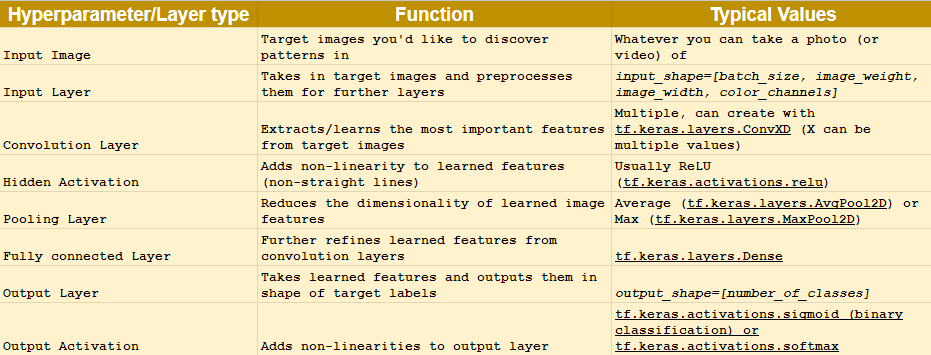

### Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-02-26 17:27:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.162.207, 173.194.210.207, 173.194.211.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.162.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   128MB/s    in 0.8s    

2024-02-26 17:27:12 (128 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]

